In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

FIRST TEST GRAPH 

In [142]:
csv = pd.read_csv("../Downloads/D&T.csv", header = None)

In [161]:
csv.columns

Index([0, 1, 'Diff', 'Time'], dtype='object')

In [2]:
def time_secs(string):
    time_string = string
    date_time = datetime.strptime(time_string, "%H:%M:%S")
    a_timedelta = date_time - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    #print(seconds)
    return seconds

In [145]:
for i in range(220):
    time = time_secs(csv[0][i])
    csv[0][i] = time

In [149]:
for i in range(219):
    if i == 0:
        continue
    csv['Diff'][i] = csv[0][i+1]- csv[0][i]
csv['Diff'][0] = 0

<ipython-input-149-fdca013832da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Diff'][i] = csv[0][i+1]- csv[0][i]
<ipython-input-149-fdca013832da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Diff'][0] = 0


In [148]:
csv['Diff'] = 0

In [150]:
csv['Time']  = 0

In [62]:
csv[1][0]

'0.35'

In [151]:
total = 0
for i in range(220):
    if i == 0:
        continue
    total_two = csv['Diff'][i]+ csv['Diff'][i-1]
    total = total + total_two
    csv['Time'][i] = total

<ipython-input-151-80f383276ce1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['Time'][i] = total


In [152]:
csv[1][0]

'0.35 Velocity'

In [155]:
for i in range(220):
    velo = csv[1][i].split(' ')[0]
    csv[1][i] = float(velo)

<ipython-input-155-cecc32ed2c6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv[1][i] = float(velo)


In [163]:
df_= csv.drop(0, axis =1)

In [164]:
df_[1][0]

0.35

In [171]:
df_

,1,Diff,Time,RPM
0,0.35,0,0,10
1,9.67,1,1,295
2,9.45,1,3,288
3,10.21,2,6,311
4,10.48,1,9,320
...,...,...,...,...
215,11.99,2,616,366
216,9.15,2,620,279
217,5.23,8,630,159
218,1.49,3,641,45


In [170]:
df_['RPM']= 0
for i in range(len(df_[1])):
    df_['RPM'][i] = float((6000/(np.pi*62.5))*df_[1][i])

<ipython-input-170-faed86ab554a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['RPM'][i] = float((6000/(np.pi*62.5))*df_[1][i])


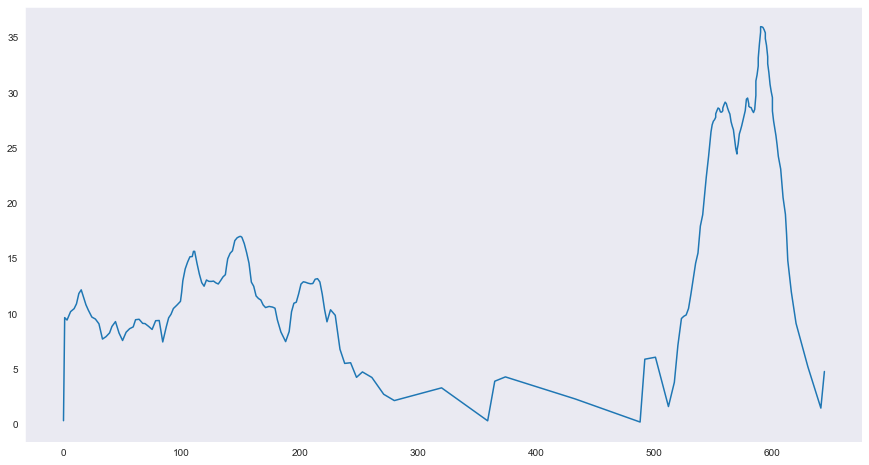

In [172]:
plt.figure(figsize = (15,8))
plt.plot(df_['Time'], df_[1])
plt.ylim()
plt.grid()

FIRST PROPER TEST GRAPH AFTER THE FIRST SUCCESSFUL RUN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df1 = pd.read_csv("../Downloads/Untitled spreadsheet - Sheet1.csv", header = None)

In [5]:
df1

,0
0,Data
1,17:03:54.749 -> 22.61 RPM
2,17:03:57.101 -> 76.49 RPM
3,17:03:58.565 -> 124.50 RPM
4,17:03:59.757 -> 150.71 RPM
...,...
264,17:05:48.223 -> 342.71 RPM
265,17:05:48.833 -> 297.46 RPM
266,17:05:49.560 -> 247.49 RPM
267,17:05:50.616 -> 173.75 RPM


In [6]:
df1 = df1.drop(0)

In [7]:
df1[0][1].split("->")[0].strip()

'17:03:54.749'

In [8]:
time, rpm = [], []
for i in range(1,len(df1[0])+1):
    time.append(df1[0][i].split("->")[0].strip().split('.')[0])
    #time.append(df1[0][i].split("->")[0].strip())
    rpm.append(float(df1[0][i].split("->")[-1].strip().split(' ')[0]))

In [9]:
df1['RPM'] = rpm
df1['Time'] = time

In [10]:
def time_secs(string):
    time_string = string
    date_time = datetime.strptime(time_string, "%H:%M:%S")
    a_timedelta = date_time - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    #print(seconds)
    return seconds

In [11]:
second = []
for i in range(1,len(df1[0])+1):
    second.append(time_secs(df1['Time'][i]))
df1['Seconds'] = second

In [12]:
df1

,0,RPM,Time,Seconds
1,17:03:54.749 -> 22.61 RPM,22.61,17:03:54,61434.0
2,17:03:57.101 -> 76.49 RPM,76.49,17:03:57,61437.0
3,17:03:58.565 -> 124.50 RPM,124.50,17:03:58,61438.0
4,17:03:59.757 -> 150.71 RPM,150.71,17:03:59,61439.0
5,17:04:00.789 -> 173.79 RPM,173.79,17:04:00,61440.0
...,...,...,...,...
264,17:05:48.223 -> 342.71 RPM,342.71,17:05:48,61548.0
265,17:05:48.833 -> 297.46 RPM,297.46,17:05:48,61548.0
266,17:05:49.560 -> 247.49 RPM,247.49,17:05:49,61549.0
267,17:05:50.616 -> 173.75 RPM,173.75,17:05:50,61550.0


In [13]:
time = []
for i in range(1,len(df1[0])+1):
    #time.append(df1[0][i].split("->")[0].strip().split('.')[0])
    time.append(df1[0][i].split("->")[0].strip())
df1['Time'] = time

In [14]:
diff = [0]
for i in range(2, 268):
    #df1['Diff'][i] = df1['Seconds'][i+1]- df1['Seconds'][i]
    diff.append(df1['Seconds'][i]- df1['Seconds'][i-1])
diff.append(df1['Seconds'][268]- df1['Seconds'][267])

total = 0
tt = [0]
for i in range(len(diff)):
    if i ==0:
        continue
    total_two = diff[i]
    total = total + total_two
    tt.append(total)

In [15]:
df1["Diff"]=diff
df1['Total']=tt

In [16]:
velocity = []
for i in range(1,268):
    velo = round((np.pi*df1['RPM'][i]*62.5)/6000, 3)
    velocity.append(velo)
velocity.append(round((np.pi*df1['RPM'][268]*62.5)/6000, 3))
df1['Velocity'] = velocity

In [17]:
circum = 62.5*np.pi
distance = [0]
for i in range(2,269):
    if df1['Time'][i] == 0.0:
        d1 = float(df1['Time'][i].split('.')[-1])/1000
        d2 = float(df1['Time'][i-1].split('.')[-1])/1000
        delta = d1 - d2
        dist = round(df1['Velocity'][i]*delta, 3)
        distance.append(dist)
        
    else: 
        dist = round(df1['Velocity'][i]*df1['Diff'][i], 3)
        distance.append(dist)

In [18]:
for i in range(1,len(distance)):
    if distance[i] == 0.0:
        d2 = float(df1['Time'][i].split('.')[-1])/1000
        d1 = float(df1['Time'][i+1].split('.')[-1])/1000
        delta = d1 - d2
        dist = round(df1['Velocity'][i]*delta, 3)
        distance.pop(i)
        distance.insert(i,dist)
        #x.append(dist)

In [19]:
metre = 0
for i in range(len(distance)):
    metre += distance[i]
    distance[i] = metre

In [20]:
df1['Distance'] = distance

Text(0, 0.5, 'Velocity')

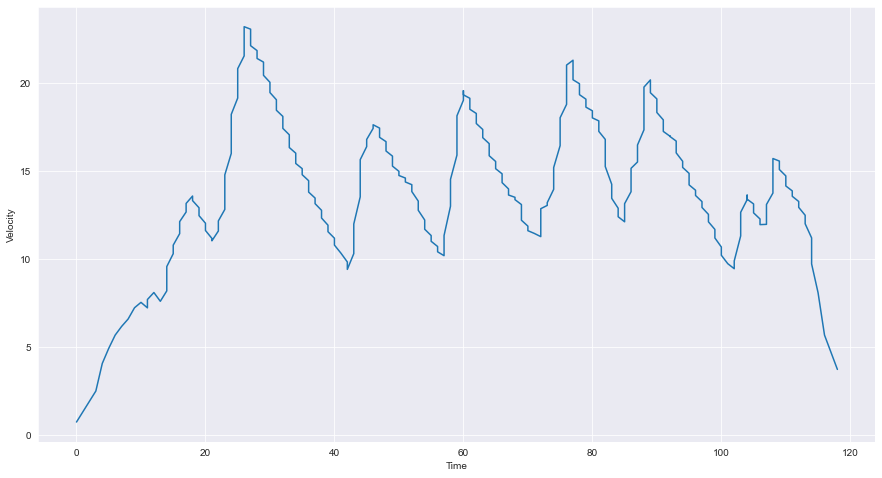

In [21]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
plt.plot(df1['Total'], df1['Velocity'])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("Velocity")
#plt.grid()

Text(0, 0.5, 'RPM')

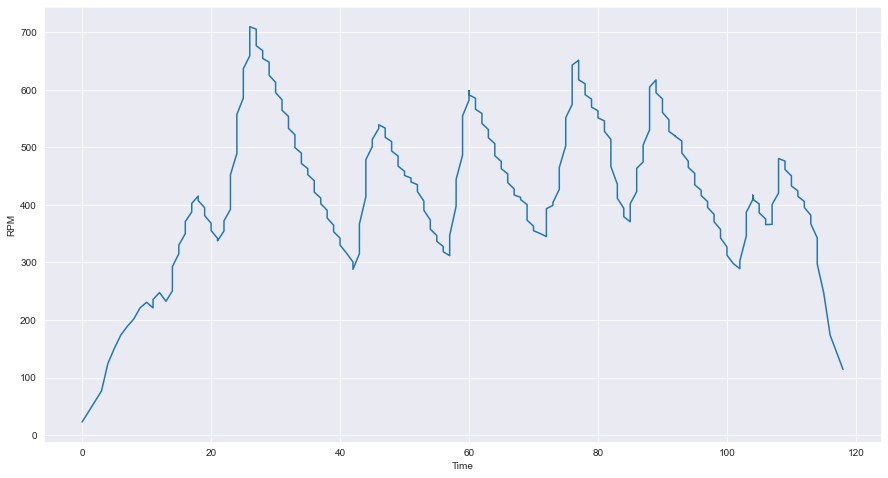

In [22]:
plt.figure(figsize = (15,8))
plt.plot(df1['Total'], df1['RPM'])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("RPM")

Text(0, 0.5, 'Velocity')

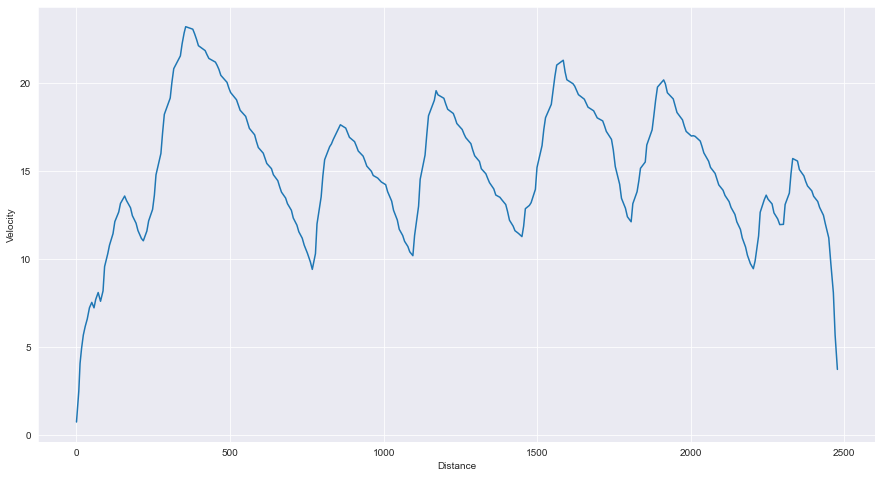

In [23]:
plt.figure(figsize = (15,8))
plt.plot(df1['Distance'], df1['Velocity'])
plt.xlabel("Distance")
plt.ylabel("Velocity")

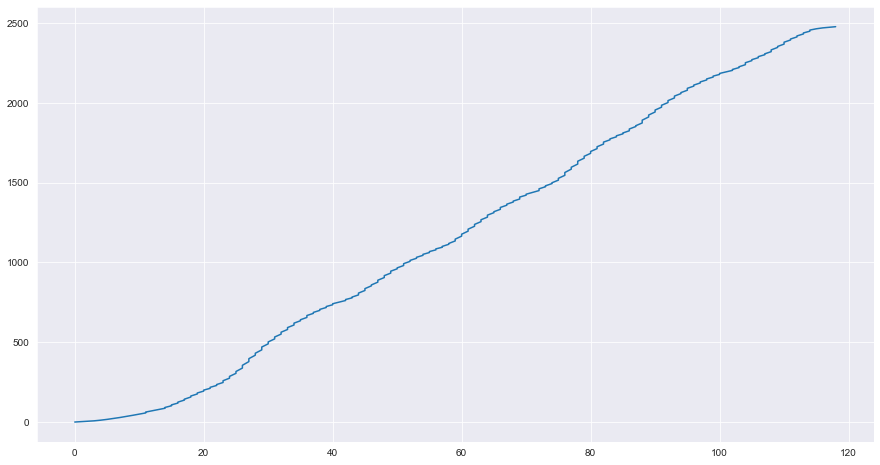

In [24]:
plt.figure(figsize = (15,8))
plt.plot(df1['Total'], df1['Distance'])

SECOND PROPER GRAPH (BURN AND COAST)

In [25]:
df2 = pd.read_csv("../Downloads/d&T 2 - Sheet2.csv", header = None)

In [26]:
df2

,0
0,17:15:21.394 -> 43.16 RPM
1,17:15:26.559 -> 34.97 RPM
2,17:15:27.377 -> 216.83 RPM
3,17:15:28.004 -> 284.29 RPM
4,17:15:28.552 -> 338.94 RPM
...,...
252,17:19:11.948 -> 182.03 RPM
253,17:19:12.935 -> 182.87 RPM
254,17:19:13.966 -> 173.04 RPM
255,17:19:15.189 -> 146.23 RPM


In [27]:
time, rpm = [], []
for i in range(len(df2[0])):
    time.append(df2[0][i].split("->")[0].strip().split('.')[0])
    #time.append(df1[0][i].split("->")[0].strip())
    rpm.append(float(df2[0][i].split("->")[-1].strip().split(' ')[0]))
df2['RPM'] = rpm
df2['Time'] = time

In [28]:
second = []
for i in range(len(df2[0])):
    second.append(time_secs(df2['Time'][i]))
df2['Seconds'] = second

time = []
for i in range(len(df2[0])):
    #time.append(df2[0][i].split("->")[0].strip().split('.')[0])
    time.append(df2[0][i].split("->")[0].strip())
    
df2['Time'] = time
diff = [0]
for i in range(1, 257):
    #df1['Diff'][i] = df1['Seconds'][i+1]- df1['Seconds'][i]
    diff.append(df2['Seconds'][i]- df2['Seconds'][i-1])
#diff.append(df2['Seconds'][257]- df2['Seconds'][256])

total = 0
tt = [0]
for i in range(len(diff)):
    if i ==0:
        continue
    total_two = diff[i]
    total = total + total_two
    tt.append(total)

df2["Diff"]=diff
df2['Total']=tt

velocity = []
for i in range(257):
    velo = round((np.pi*df2['RPM'][i]*62.5)/6000, 3) # RPM * PI * D/ 6000
    velocity.append(velo)
#velocity.append(round((np.pi*df2['RPM'][257]*62.5)/6000, 3))
df2['Velocity'] = velocity

Text(0, 0.5, 'Velocity')

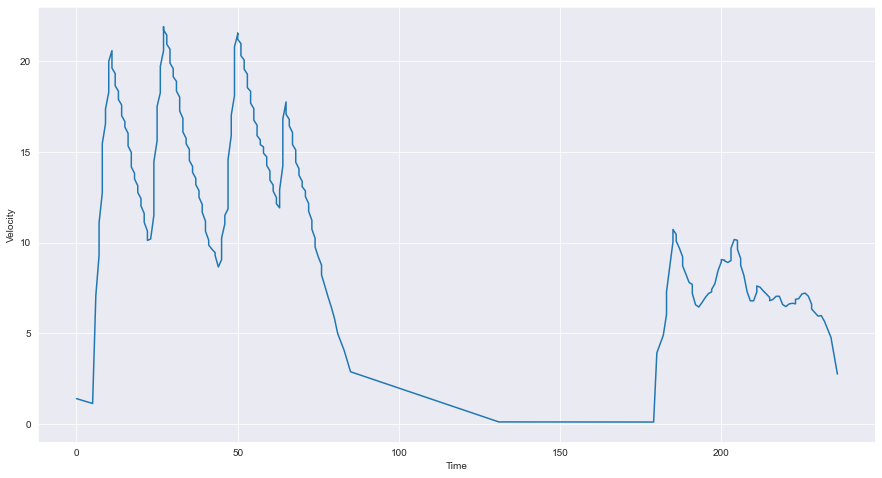

In [29]:
plt.figure(figsize = (15,8))
plt.plot(df2['Total'], df2['Velocity'])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity')

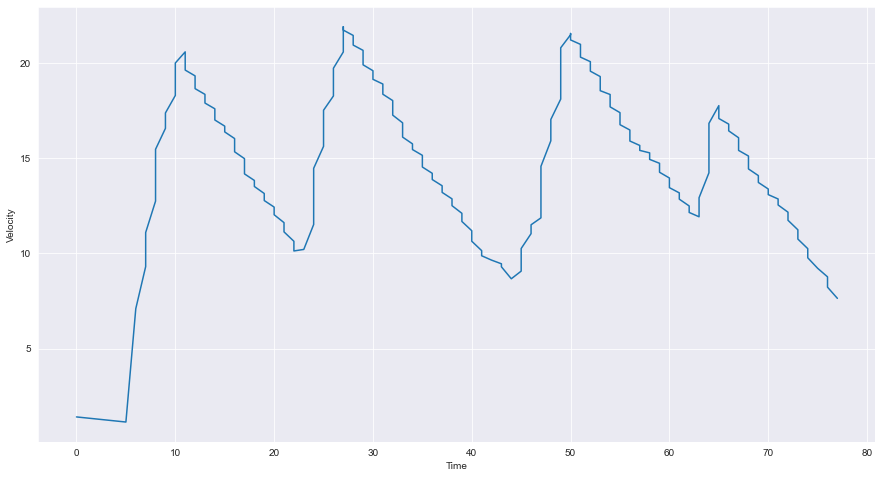

In [30]:
plt.figure(figsize = (15,8))
plt.plot(df2['Total'][:180], df2['Velocity'][:180])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity')

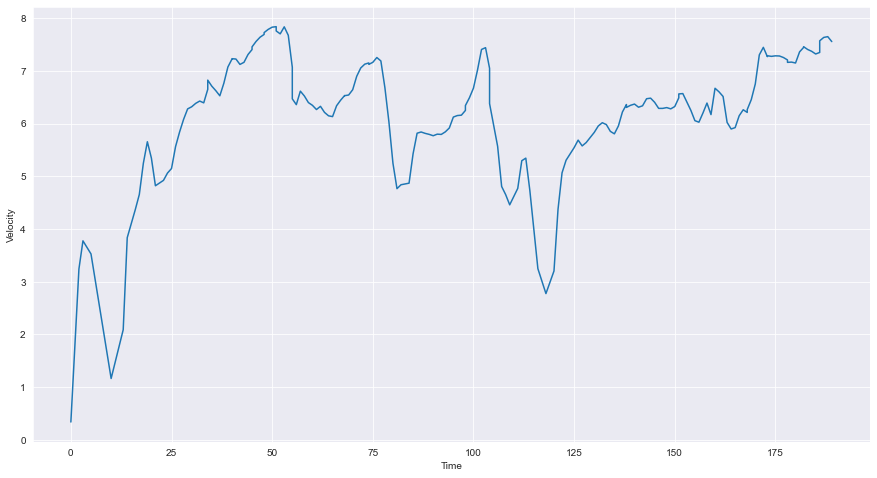

In [36]:
plt.figure(figsize = (15,8))
plt.plot(df3['Total'][:190], df3['Velocity'][:190])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("Velocity")

THIRD GRAPH (ACCELERATING)

In [32]:
df3 = pd.read_csv("../Downloads/d&T 3 - Sheet3.csv", header = None)

In [33]:
df3

,0
0,17:08:23.384 -> 10.35 RPM
1,17:08:25.176 -> 99.08 RPM
2,17:08:26.728 -> 115.41 RPM
3,17:08:28.417 -> 107.80 RPM
4,17:08:33.492 -> 35.61 RPM
...,...
267,17:12:54.853 -> 177.10 RPM
268,17:12:55.929 -> 169.08 RPM
269,17:12:57.114 -> 149.05 RPM
270,17:12:58.616 -> 120.28 RPM


In [34]:
time, rpm = [], []
for i in range(len(df3[0])):
    time.append(df3[0][i].split("->")[0].strip().split('.')[0])
    #time.append(df1[0][i].split("->")[0].strip())
    rpm.append(float(df3[0][i].split("->")[-1].strip().split(' ')[0]))
df3['RPM'] = rpm
df3['Time'] = time

In [35]:
second = []
for i in range(len(df3[0])):
    second.append(time_secs(df3['Time'][i]))
df3['Seconds'] = second

time = []
for i in range(len(df3[0])):
    #time.append(df3[0][i].split("->")[0].strip().split('.')[0])
    time.append(df3[0][i].split("->")[0].strip())
df3['Time'] = time

diff = [0]
for i in range(1, 272):
    #df1['Diff'][i] = df1['Seconds'][i+1]- df1['Seconds'][i]
    diff.append(df3['Seconds'][i]- df3['Seconds'][i-1])
#diff.append(df2['Seconds'][257]- df2['Seconds'][256])

total = 0
tt = [0]
for i in range(len(diff)):
    if i ==0:
        continue
    total_two = diff[i]
    total = total + total_two
    tt.append(total)

df3["Diff"]=diff
df3['Total']=tt

velocity = []
for i in range(272):
    velo = round((np.pi*df3['RPM'][i]*62.5)/6000, 3)
    velocity.append(velo)
#velocity.append(round((np.pi*df2['RPM'][257]*62.5)/6000, 3))
df3['Velocity'] = velocity

Text(0, 0.5, 'Velocity')

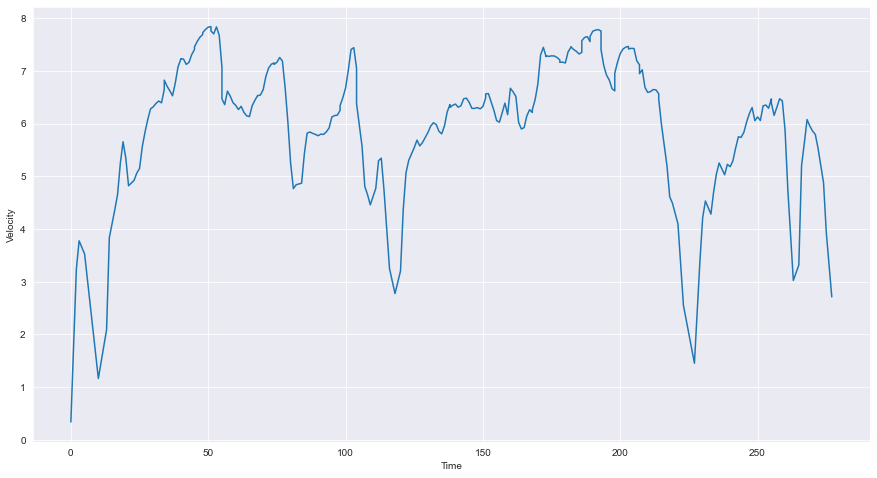

In [37]:
plt.figure(figsize = (15,8))
plt.plot(df3['Total'], df3['Velocity'])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("Velocity")

Text(0, 0.5, 'RPM')

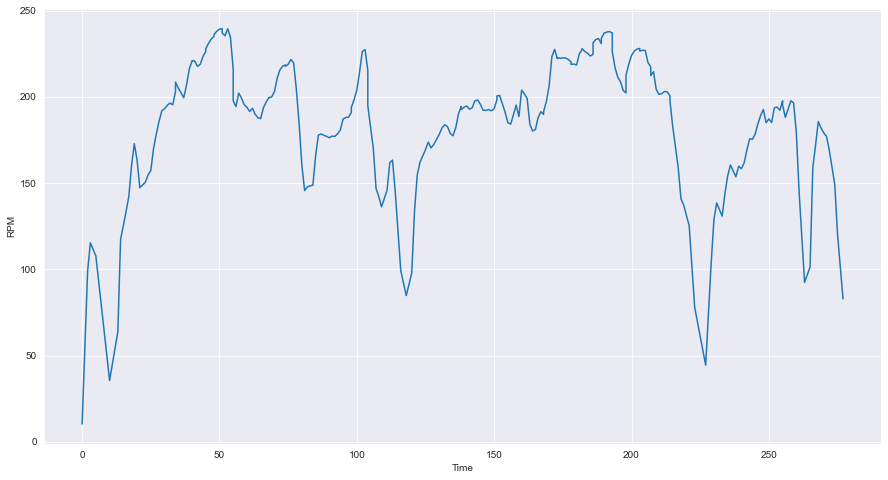

In [38]:
plt.figure(figsize = (15,8))
plt.plot(df3['Total'], df3['RPM'])
plt.ylim()
plt.xlabel("Time")
plt.ylabel("RPM")

In [128]:
df1.to_csv("D&tpart1.csv")
df2.to_csv("D&tpart2.csv")
df3.to_csv("D&tpart3.csv")

In [39]:
df1_modified = df1.drop('Distance', axis =1)

In [40]:
df = pd.concat([df1_modified, df2, df3], ignore_index = True)

In [41]:
df

,0,RPM,Time,Seconds,Diff,Total,Velocity
0,17:03:54.749 -> 22.61 RPM,22.61,17:03:54.749,61434.0,0.0,0.0,0.740
1,17:03:57.101 -> 76.49 RPM,76.49,17:03:57.101,61437.0,3.0,3.0,2.503
2,17:03:58.565 -> 124.50 RPM,124.50,17:03:58.565,61438.0,1.0,4.0,4.074
3,17:03:59.757 -> 150.71 RPM,150.71,17:03:59.757,61439.0,1.0,5.0,4.932
4,17:04:00.789 -> 173.79 RPM,173.79,17:04:00.789,61440.0,1.0,6.0,5.687
...,...,...,...,...,...,...,...
792,17:12:54.853 -> 177.10 RPM,177.10,17:12:54.853,61974.0,1.0,271.0,5.796
793,17:12:55.929 -> 169.08 RPM,169.08,17:12:55.929,61975.0,1.0,272.0,5.533
794,17:12:57.114 -> 149.05 RPM,149.05,17:12:57.114,61977.0,2.0,274.0,4.878
795,17:12:58.616 -> 120.28 RPM,120.28,17:12:58.616,61978.0,1.0,275.0,3.936


In [42]:
df.describe()

,RPM,Seconds,Diff,Total,Velocity
count,797.000000,797.000000,797.000000,797.000000,797.000000
mean,343.473538,61843.150565,0.791719,95.816813,11.240143
std,162.203116,296.250586,2.397503,72.442381,5.308086
min,3.740000,61434.000000,0.000000,0.000000,0.122000
25%,199.650000,61521.000000,0.000000,39.000000,6.534000
50%,324.920000,61840.000000,1.000000,72.000000,10.633000
75%,478.690000,62148.000000,1.000000,148.000000,15.665000
max,709.880000,62357.000000,48.000000,277.000000,23.231000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         797 non-null    object 
 1   RPM       797 non-null    float64
 2   Time      797 non-null    object 
 3   Seconds   797 non-null    float64
 4   Diff      797 non-null    float64
 5   Total     797 non-null    float64
 6   Velocity  797 non-null    float64
dtypes: float64(5), object(2)
memory usage: 43.7+ KB


In [44]:
time_list = list(df1['Total'])

In [45]:
for i in range(len(df2[0])):
    time_list.append(time_list[-1] + df2['Diff'][i])
for i in range(len(df3[0])):
    time_list.append(time_list[-1] + df3['Diff'][i])

In [46]:
df['Total_time'] = time_list

Text(0, 0.5, 'Velocity')

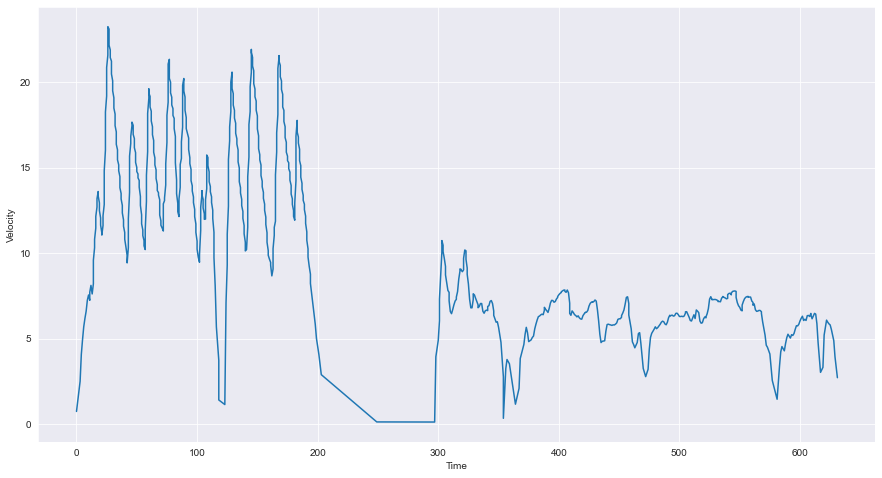

In [47]:
plt.figure(figsize = (15,8))
plt.plot(df['Total_time'], df['Velocity'])
plt.xlabel("Time")
plt.ylabel("Velocity")

In [82]:
df

,0,RPM,Time,Seconds,Diff,Total,Velocity,Total_time
0,17:03:54.749 -> 22.61 RPM,22.61,17:03:54.749,61434.0,0.0,0.0,0.740,0.0
1,17:03:57.101 -> 76.49 RPM,76.49,17:03:57.101,61437.0,3.0,3.0,2.503,3.0
2,17:03:58.565 -> 124.50 RPM,124.50,17:03:58.565,61438.0,1.0,4.0,4.074,4.0
3,17:03:59.757 -> 150.71 RPM,150.71,17:03:59.757,61439.0,1.0,5.0,4.932,5.0
4,17:04:00.789 -> 173.79 RPM,173.79,17:04:00.789,61440.0,1.0,6.0,5.687,6.0
...,...,...,...,...,...,...,...,...
792,17:12:54.853 -> 177.10 RPM,177.10,17:12:54.853,61974.0,1.0,271.0,5.796,625.0
793,17:12:55.929 -> 169.08 RPM,169.08,17:12:55.929,61975.0,1.0,272.0,5.533,626.0
794,17:12:57.114 -> 149.05 RPM,149.05,17:12:57.114,61977.0,2.0,274.0,4.878,628.0
795,17:12:58.616 -> 120.28 RPM,120.28,17:12:58.616,61978.0,1.0,275.0,3.936,629.0


In [84]:
X = df[['RPM', 'Diff','Total_time']]
y = df['Velocity']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [89]:
lr.score(X, y) #coeff of determination

0.9999999969974961

In [90]:
lr.coef_

array([ 3.27249255e-02, -7.96157756e-06,  3.25119161e-08])

In [92]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RPM,3.272493e-02
Diff,-7.961578e-06
Total_time,3.251192e-08


In [127]:
predictions = lr.predict(X_test)

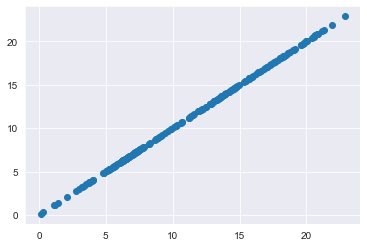

In [95]:
plt.scatter(y_test,predictions)

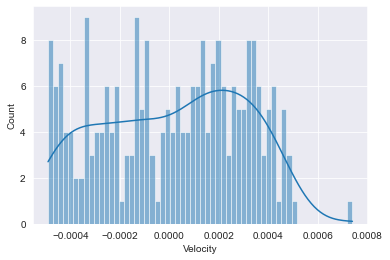

In [114]:
sns.histplot((y_test-predictions),bins=60, kde= True);

In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.0002501835018650959
MSE: 8.305441606386035e-08
RMSE: 0.000288191630801209
MAPE: 5.961072387380507e-05


In [110]:
predicted_velocities = pd.DataFrame({'True Value': y_test, 'Predicted': predictions})

In [107]:
predicted_velocities

,True Value,Predicted
139,16.577,16.577451
368,10.254,10.254025
113,12.786,12.786276
128,19.590,19.590115
695,7.289,7.289486
...,...,...
492,8.757,8.757192
72,14.469,14.468983
586,6.134,6.133630
569,7.831,7.831398


In [130]:
alpha = lr.predict(X[:270])

In [132]:
speed = pd.DataFrame({'Actual': Y[:270], 'Predicted': alpha})

In [133]:
speed

,Actual,Predicted
0,0.740,0.739902
1,2.503,2.503097
2,4.074,4.074237
3,4.932,4.931957
4,5.687,5.687248
...,...,...
265,8.099,8.099079
266,5.686,5.685943
267,3.733,3.732912
268,1.412,1.412403


Text(0, 0.5, 'Velocity')

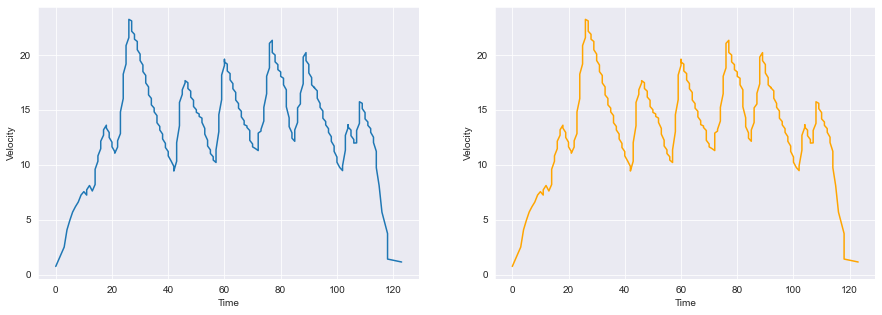

In [141]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(X['Total_time'][:270], Y[:270])
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.subplot(1,2,2)
plt.plot(X['Total_time'][:270], alpha, 'orange')
plt.xlabel("Time")
plt.ylabel("Velocity")

Predicting velocity for the first ever dataset

In [173]:
Z = df_[['RPM','Diff', 'Time']]
W = df_[1]

In [176]:
first_test = lr.predict(Z)

In [178]:
speed = pd.DataFrame({'Actual': W, 'Predicted': first_test})

In [179]:
speed

,Actual,Predicted
0,0.35,0.327241
1,9.67,9.653836
2,9.45,9.424762
3,10.21,10.177427
4,10.48,10.471960
...,...,...
215,11.99,11.977318
216,9.15,9.130250
217,5.23,5.203211
218,1.49,1.472610


Text(0, 0.5, 'Velocity')

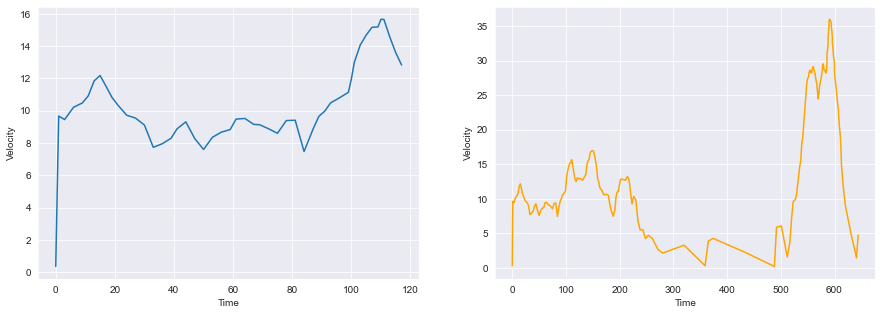

In [187]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(Z['Time'][:50], W[:50])
#plt.plot(Z['Time'], first_test, 'orange')
plt.xlabel("Time")
#plt.xlim([0,25])
plt.ylabel("Velocity")
plt.subplot(1,2,2)
plt.plot(Z['Time'], first_test, 'orange')
plt.xlabel("Time")
plt.ylabel("Velocity")

Text(0, 0.5, 'Velocity')

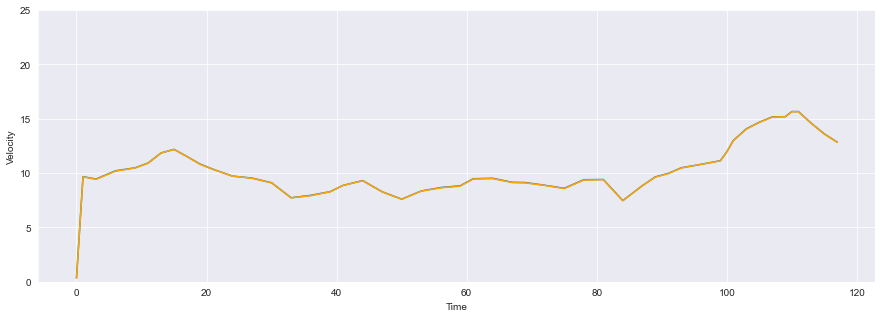

In [190]:
plt.figure(figsize = (15,5))
plt.plot(Z['Time'][:50], W[:50])
plt.plot(Z['Time'][:50], first_test[:50], 'orange')
plt.xlabel("Time")
plt.ylim([0,25])
plt.ylabel("Velocity")

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.linear_model import Lasso
ls = Lasso(alpha = 100)
ls.fit(X_train,y_train)

pred = ls.predict(X_test)
plt.scatter(y_test, pred)

Lasso(alpha=100)

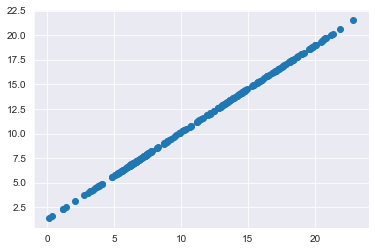

In [198]:
pred = ls.predict(X_test)
plt.scatter(y_test, pred)

In [199]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, pred))

MAE: 0.5539410900327575
MSE: 0.39315242977167986
RMSE: 0.6270186837500776
MAPE: 0.1344093714318009


In [203]:
first_test = ls.predict(Z)
speed = pd.DataFrame({'Actual': W, 'Predicted': first_test})
speed

,Actual,Predicted
0,0.35,1.615722
1,9.67,9.849684
2,9.45,9.647447
3,10.21,10.311942
4,10.48,10.571962
...,...,...
215,11.99,11.900952
216,9.15,9.387427
217,5.23,5.920495
218,1.49,2.626910


Text(0, 0.5, 'Velocity')

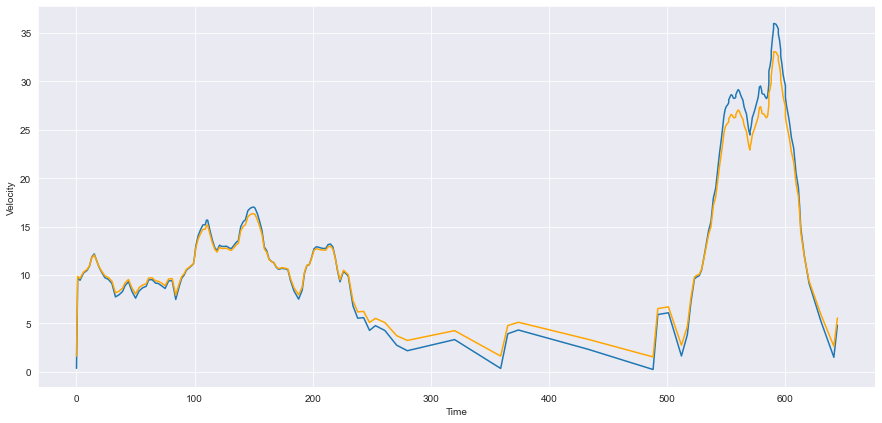

In [205]:
plt.figure(figsize = (15,7))
plt.plot(Z['Time'], W)
plt.plot(Z['Time'], first_test, 'orange')
plt.xlabel("Time")
plt.ylabel("Velocity")